# Кластеризация(KMeans)
Основная задача кластерного анализа - разбиение исходного набора объектов на различающиеся между собой подмножества объектов, состоящие из близких элементов.
### Область применения кластеризации
    - Биология и медицины (Кластеризация томограмм)
    - Маркетинг (Сегментация потребителей)(Анализ поведения групп)
    - Анализ текстов (Разбиения по темам)
    - Социальные сети (Поиск сообществ)
    - Другие


![](3C37E686-1127-48E7-972C-B9254CD6A84C.png)


Метод k-means – это один из наиболее популярных методов кластеризации. Основная идея метода заключается в том, что на каждой итерации пересчитывается центр масс (центроид) для каждого кластера, полученного на предыдущем шаге, затем объекты снова разбиваются на кластеры согласно тому, какой из новых центроидов находится ближе.

![](EFAF3BDD-CBD7-4A32-A809-D965ADDF7C65.png)

Более формально, алгоритм принимает на вход выборку $X_1, \dots, X_N$ и параметр $k$, указывающий необходимое число кластеров. Выходом алгоритма является набор из $k$ центроидов $\{\mu_1, \dots, \mu_k\}$, с помощью которых кластеризация осуществляется путём отнесения каждого объекту к ближайшему центроиду. Все точки внутри одного кластера ближе к центроиду этого кластера, чем к центроиду любого другого кластера.

Центр масс кластера(внутрикластерное среднее по каждому признаку)  $C_j\$  называется центроидом и вычисляется как  
$$\mu_j\ = {1\over |C_j| }\sum_{i \in C_j}^{}{x_i}$$

Метод может быть сформулирован как задача оптимизации, а именно, минимизации целевой функии алгоритма,которая есть сумма расстояний между объектами и центроидами классов,  к которым они пренадлежат:  $$J(C) = \sum_{i=1}^k \sum_{X_n \in C_i} d(x_i,\mu_j) \rightarrow \min, \text{где $C_i$ - это $i$-ый кластер, $\mu_j$ - это центр масс кластера $C_i$.}$$

# Метрики расстояния
Метрика - мера расстояния, неотрицательная, симметричная, если = 0, то объекты совпадают, часто требуется, чтобы выполнялось неравенство треугольника.


#### Косинусное расстояниe
$$d(x,y) = 1- \frac{<x,y>}{\sqrt<x,x>\sqrt<y,y>}$$

#### Метрика Минковского $определяется$ $как$:
![](84E95255-697E-44FF-823B-0AFDFEB381FB_4_5005_c.jpeg)
для p >= 1. При p ∈ (0, 1) данная функция метрикой не является, но все равно может использоваться как мера расстояния.
Частными случаями данной метрики являются:

#### Евклидова метрика (p = 2). $Задает$ $ расстояние $ $как$  $длину$  $прямой$, $ соединяющей$  $заданные$  $точки$.

![](9EA44661-86C8-444E-BD08-122E43BB3D95_4_5005_c.jpeg) 

#### Считающее расстояние $(p = 0)$, $равное$ $числу$ $координат$, $по$ $которым$ $векторы$ $x$ $и$ $y$ $различаются$:
![](D4956ACC-2C06-498A-9EC4-22C5C780B4E7_4_5005_c.jpeg)

Существует простой итеративный алгоритм, позволяющий найти локальный минимум указанного функционала. Алгоритм представляет собой последовательное чередование двух шагов до сходимости.
Предположим, что как-то (например, случайно) выбраны начальные положения центроидов $\mu_1, \dots, \mu_k$.
1) Этап кластеризациu. На данном этапе происходит кластеризация выборки, как было описано выше: каждый объект относится к кластеру ближайшего к нему центроида. Формально, $$C_i = \{X_n : ||X_n - \mu_i|| \leq ||X_n - \mu_j||, \text{ для всех $j \in \{1, \dots, k\}$}\}.$$
2) Этап обновления центроидов. На данном этапе центроиды пересчитываются, как центры масс только что построенных кластеров. Формально, $$\mu_i = \frac{1}{|C_i|}\sum_{X_n \in C_i} X_n.$$
Этот процесс продолжается, пока центроиды и кластеризация продолжают изменяться. Алгоритм гарантированно сходится, однако не гарантируется достижение глобального минимума – а только одного из локальных минимумов. Другим недостатком алгоритма является то, что итоговая кластеризация зависит от выбора исходных центров кластеров. На практике алгоритм запускается несколько раз из различных начальных приближений, а полученные результаты некоторым образом усредняются. Стоит также отметить, что число кластеров необходимо знать заранее. Существуют различные эвристики, позволяющие выбирать в некотором смысле оптимальное число кластеров.



# Elbow Method (Метод локтя)
Каждому $k$ ставится в соответствие значение функционала $J(C)$. Принятие решения о количестве кластеров заключается в точ, что нужное найти такую точку $k'$, начиная с которой значения функционала $J(C)$ падают не слишком быстро. То есть соотношение невелико: $$D(k) = |\frac{J(k)-J(k+1)}{J(k-1)-J(k)}|$$


![](1C83AFA5-83A2-4559-80E1-9BD62FFAD888_4_5005_c.jpeg)


## Пример: кластеризация игроков NBA

In [5]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

nba = pd.read_csv("nba_2013.csv")
nba.head(3)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013


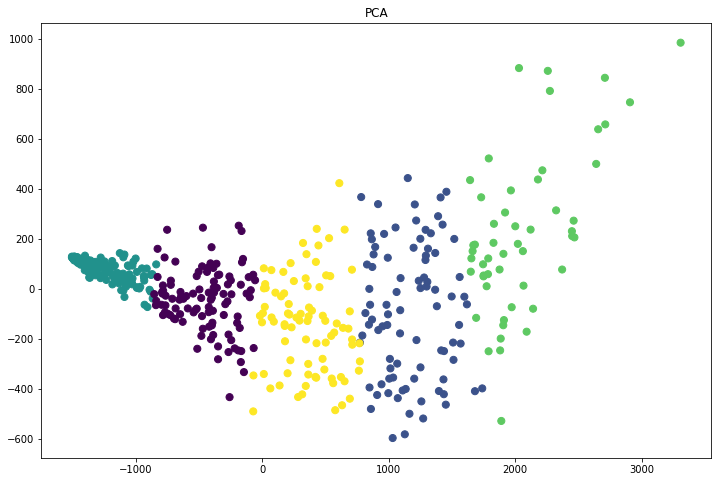

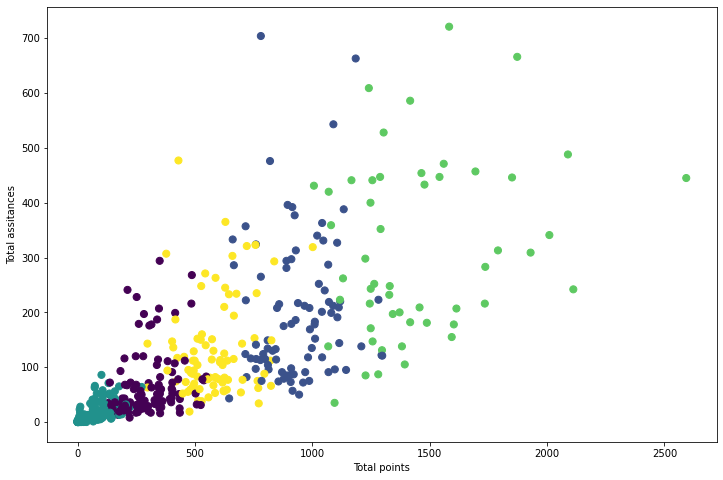

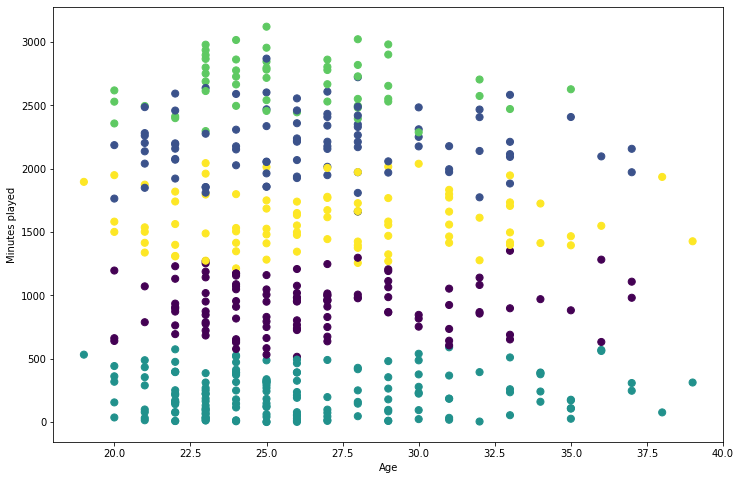

In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=5, random_state=1)
numeric_cols = nba._get_numeric_data().dropna(axis=1)
kmeans.fit(numeric_cols)


# Визуализация при помощи метода главных компонент
pca = PCA(n_components=2)
res = pca.fit_transform(numeric_cols)
plt.figure(figsize=(12,8))
plt.scatter(res[:,0], res[:,1], c=kmeans.labels_, s=50, cmap='viridis')
plt.title('PCA')

# Визуализация при помощи 2 свойств: Набранные очки и Набранные передачи
plt.figure(figsize=(12,8))
plt.scatter(nba['pts'], nba['ast'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Total points')
plt.ylabel('Total assitances')

# Визуализация при помощи 2 свойств: Возраст и 
plt.figure(figsize=(12,8))
plt.scatter(nba['age'], nba['mp'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Minutes played');

### Инициализация центроидов
Метод sklearn.KMeans содержит параметры n_init (число запусков из различных начальных приближений) и init. Есть три способа инициализации центроидов:
- k-means++ – "умная" инициализация центроидов для ускорения сходимости.
- random – случайная инициализация центроидов.
- ndarray – заданная инициализация центроидов.


### Кластеризация рукописных цифр

In [31]:
from sklearn.datasets import load_digits

digits = load_digits()

X, y = digits.data, digits.target

In [33]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)

KMeans(n_clusters=10)

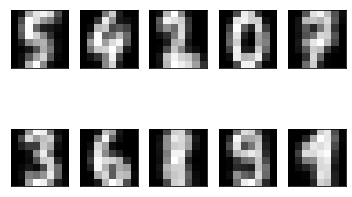

In [49]:
_, axes = plt.subplots(2, 5)
for ax, center in zip(axes.ravel(), kmeans.cluster_centers_):
    ax.matshow(center.reshape(8, 8), cmap=plt.cm.gray)
    ax.set_xticks(())
    ax.set_yticks(())

## Применение KMeans для сжатия изображений

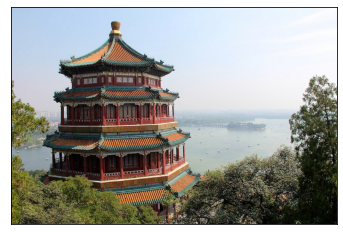

In [54]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [56]:
china.shape #Высота Ширина Количество каналов(каждый канал кодируется значением от 0 до 255)

(427, 640, 3)

In [57]:
data = china / 255.0 # к значению от 0 до 1
data = data.reshape(427 * 640, 3) # К вектору
data.shape

(273280, 3)

Посмотрим на подможество из 10000 пикселей на зависимость цветов

In [81]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

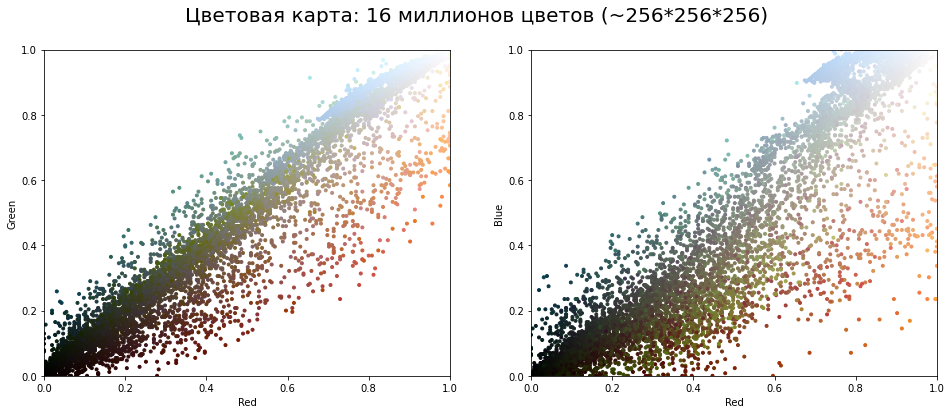

In [82]:
plot_pixels(data, title='Цветовая карта: 16 миллионов цветов (~256*256*256)')

Попробуем перейти к 16 цветам

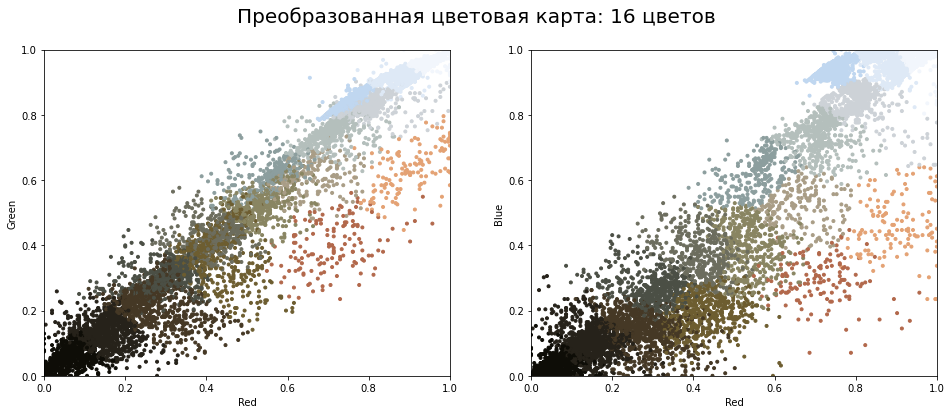

In [63]:
import warnings; warnings.simplefilter('ignore') 

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Преобразованная цветовая карта: 16 цветов")

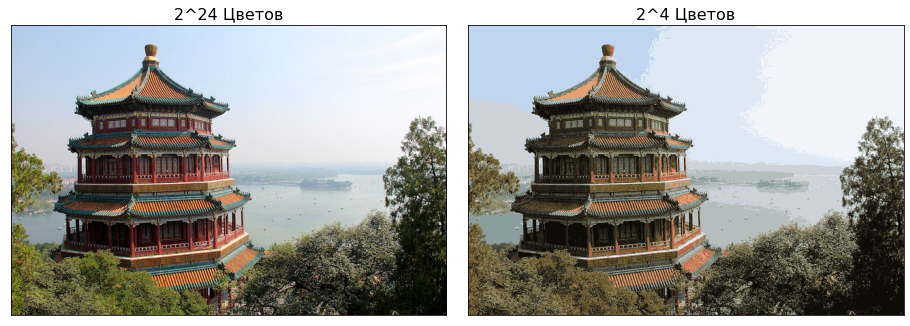

In [85]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('2^24 Цветов', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('2^4 Цветов', size=16);

![](82357A04-892F-43B1-96B9-E49BF8BCB455.png)

''